In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# importing the data
df = pd.read_excel(r"C:\\Users\rajam\Desktop\Tweets.xlsx")
df.head()

,content
0,RT @sadhika_tiwari: A 46-year-old dies after v...
1,RT @mid_day: #MiddayNews | Consent form for #C...
2,RT @Piyu_Nair: @Saltpistachio Covishield!
3,RT @TimesNow: #Breaking | Bharat Biotech to pa...
4,RT @the_fauxy: After No Side Effect Of Covaxin...


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5462 non-null   object
dtypes: object(1)
memory usage: 42.8+ KB


In [4]:
#data cleaning
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
# remove twitter handles (@user)
df['clean_content'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")

In [6]:
df.head()

,content,clean_content
0,RT @sadhika_tiwari: A 46-year-old dies after v...,RT : A 46-year-old dies after vaccination in M...
1,RT @mid_day: #MiddayNews | Consent form for #C...,RT : #MiddayNews | Consent form for #Covaxin s...
2,RT @Piyu_Nair: @Saltpistachio Covishield!,RT : Covishield!
3,RT @TimesNow: #Breaking | Bharat Biotech to pa...,RT : #Breaking | Bharat Biotech to pay compens...
4,RT @the_fauxy: After No Side Effect Of Covaxin...,"RT : After No Side Effect Of Covaxin, Liberal ..."


In [7]:
# remove special characters, numbers and punctuations
df['clean_content'] = df['clean_content'].str.replace("[^a-zA-Z#]", " ")
df.head()

,content,clean_content
0,RT @sadhika_tiwari: A 46-year-old dies after v...,RT A year old dies after vaccination in M...
1,RT @mid_day: #MiddayNews | Consent form for #C...,RT #MiddayNews Consent form for #Covaxin s...
2,RT @Piyu_Nair: @Saltpistachio Covishield!,RT Covishield
3,RT @TimesNow: #Breaking | Bharat Biotech to pa...,RT #Breaking Bharat Biotech to pay compens...
4,RT @the_fauxy: After No Side Effect Of Covaxin...,RT After No Side Effect Of Covaxin Liberal ...


In [8]:
# remove short words
df['clean_content'] = df['clean_content'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,content,clean_content
0,RT @sadhika_tiwari: A 46-year-old dies after v...,year dies after vaccination Muradabad vaccine ...
1,RT @mid_day: #MiddayNews | Consent form for #C...,#MiddayNews Consent form #Covaxin shot cause c...
2,RT @Piyu_Nair: @Saltpistachio Covishield!,Covishield
3,RT @TimesNow: #Breaking | Bharat Biotech to pa...,#Breaking Bharat Biotech compensation Covaxin ...
4,RT @the_fauxy: After No Side Effect Of Covaxin...,After Side Effect Covaxin Liberal Bangs Head W...


In [9]:
# individual words considered as tokens
tokenized_tweet = df['clean_content'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [year, dies, after, vaccination, Muradabad, va...
1    [#MiddayNews, Consent, form, #Covaxin, shot, c...
2                                         [Covishield]
3    [#Breaking, Bharat, Biotech, compensation, Cov...
4    [After, Side, Effect, Covaxin, Liberal, Bangs,...
Name: clean_content, dtype: object

In [10]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [year, die, after, vaccin, muradabad, vaccin, ...
1    [#middaynew, consent, form, #covaxin, shot, ca...
2                                         [covishield]
3    [#break, bharat, biotech, compens, covaxin, ca...
4    [after, side, effect, covaxin, liber, bang, he...
Name: clean_content, dtype: object

In [11]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_content'] = tokenized_tweet
df.head()



,content,clean_content
0,RT @sadhika_tiwari: A 46-year-old dies after v...,year die after vaccin muradabad vaccin covishield
1,RT @mid_day: #MiddayNews | Consent form for #C...,#middaynew consent form #covaxin shot caus con...
2,RT @Piyu_Nair: @Saltpistachio Covishield!,covishield
3,RT @TimesNow: #Breaking | Bharat Biotech to pa...,#break bharat biotech compens covaxin caus sid...
4,RT @the_fauxy: After No Side Effect Of Covaxin...,after side effect covaxin liber bang head wall...


In [12]:
 !pip install wordcloud


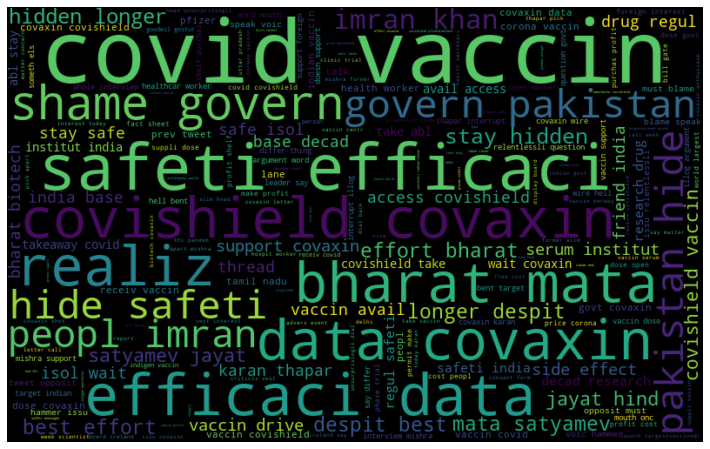

In [13]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_content']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df.isnull().sum()

content          0
clean_content    0
dtype: int64

In [15]:
#drop content column
df = df.drop(['content'], axis=1)

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
#calculating the tweets sentiment
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["clean_content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["clean_content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["clean_content"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["clean_content"]]
df.head()

,clean_content,Positive,Negative,Neutral,Compound
0,year die after vaccin muradabad vaccin covishield,0.000,0.394,0.606,-0.5994
1,#middaynew consent form #covaxin shot caus con...,0.137,0.000,0.863,0.2263
2,covishield,0.000,0.000,1.000,0.0000
3,#break bharat biotech compens covaxin caus sid...,0.000,0.000,1.000,0.0000
4,after side effect covaxin liber bang head wall...,0.000,0.000,1.000,0.0000


In [18]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,clean_content,Positive,Negative,Neutral,Compound,Sentiment
0,year die after vaccin muradabad vaccin covishield,0.000,0.394,0.606,-0.5994,Negative
1,#middaynew consent form #covaxin shot caus con...,0.137,0.000,0.863,0.2263,Positive
2,covishield,0.000,0.000,1.000,0.0000,Neutral
3,#break bharat biotech compens covaxin caus sid...,0.000,0.000,1.000,0.0000,Neutral
4,after side effect covaxin liber bang head wall...,0.000,0.000,1.000,0.0000,Neutral


Text(0.5, 0, 'Sentiment')

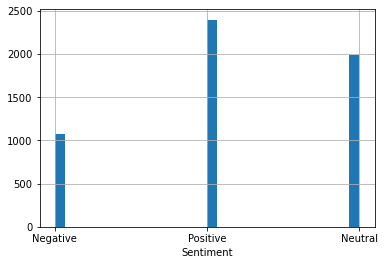

In [19]:
df['Sentiment'].hist(bins=30)
plt.xlabel('Sentiment')

In [20]:
df1 = df[(df["Sentiment"] == "Positive") | (df["Sentiment"] == "Negative")]
df1



,clean_content,Positive,Negative,Neutral,Compound,Sentiment
0,year die after vaccin muradabad vaccin covishield,0.000,0.394,0.606,-0.5994,Negative
1,#middaynew consent form #covaxin shot caus con...,0.137,0.000,0.863,0.2263,Positive
9,last week scientist issu covaxin letter call t...,0.185,0.000,0.815,0.7096,Positive
10,summari take covishield also known astrazeneca...,0.104,0.000,0.896,0.4404,Positive
11,whole interview mishra support covaxin karan t...,0.316,0.220,0.464,0.4767,Positive
...,...,...,...,...,...,...
5448,least three state tamil nadu telangana bihar t...,0.063,0.041,0.896,0.1725,Positive
5454,shame govern pakistan hide safeti efficaci dat...,0.124,0.141,0.735,0.1027,Positive
5456,have sever friend have receiv covaxin jealou t...,0.132,0.000,0.868,0.4939,Positive
5458,prev tweet opposit must blame speak voic hamme...,0.000,0.094,0.906,-0.3400,Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

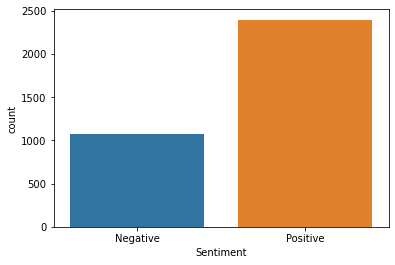

In [21]:
sns.countplot(x='Sentiment',data=df1)

In [22]:
  
# creating a dict file 
Sentiment = {'Positive': 0,'Negative': 1}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
df1.Sentiment = [Sentiment[item] for item in df1.Sentiment]
print(df1)


                                          clean_content  Positive  Negative  \
0     year die after vaccin muradabad vaccin covishield     0.000     0.394   
1     #middaynew consent form #covaxin shot caus con...     0.137     0.000   
9     last week scientist issu covaxin letter call t...     0.185     0.000   
10    summari take covishield also known astrazeneca...     0.104     0.000   
11    whole interview mishra support covaxin karan t...     0.316     0.220   
...                                                 ...       ...       ...   
5448  least three state tamil nadu telangana bihar t...     0.063     0.041   
5454  shame govern pakistan hide safeti efficaci dat...     0.124     0.141   
5456  have sever friend have receiv covaxin jealou t...     0.132     0.000   
5458  prev tweet opposit must blame speak voic hamme...     0.000     0.094   
5461  heard stori brother treat differenti befor nev...     0.173     0.060   

      Neutral  Compound  Sentiment  
0       0.606 

In [23]:
df1 = df1.drop(['Positive', 'Negative', 'Neutral', 'Compound'], axis=1)


In [24]:
df1

,clean_content,Sentiment
0,year die after vaccin muradabad vaccin covishield,1
1,#middaynew consent form #covaxin shot caus con...,0
9,last week scientist issu covaxin letter call t...,0
10,summari take covishield also known astrazeneca...,0
11,whole interview mishra support covaxin karan t...,0
...,...,...
5448,least three state tamil nadu telangana bihar t...,0
5454,shame govern pakistan hide safeti efficaci dat...,0
5456,have sever friend have receiv covaxin jealou t...,0
5458,prev tweet opposit must blame speak voic hamme...,1


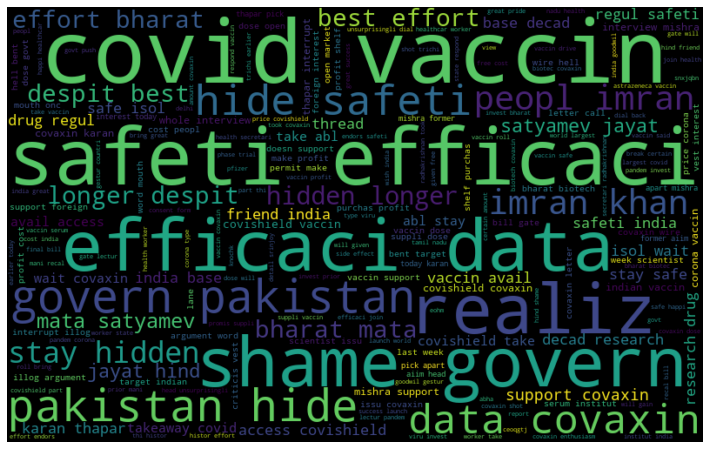

In [25]:
#negative word
all_words = " ".join([sentence for sentence in df1['clean_content'][df1['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

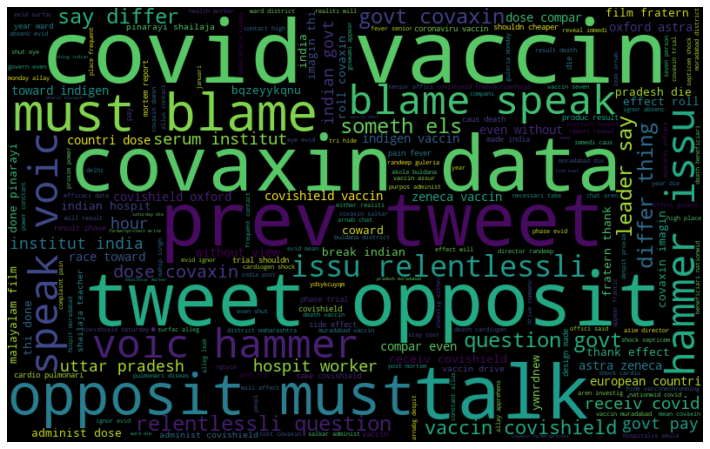

In [26]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df1['clean_content'][df1['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags  

In [28]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df1['clean_content'][df1['Sentiment']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df1['clean_content'][df1['Sentiment']==1])

In [29]:
ht_positive[:5]

[['middaynew', 'covaxin'], [], [], [], []]

In [30]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [31]:
ht_positive[:5]

['middaynew', 'covaxin', 'covishield', 'atmanirbharbharat', 'sanjeevani']

In [32]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,middaynew,1
1,covaxin,300
2,covishield,251
3,atmanirbharbharat,5
4,sanjeevani,1


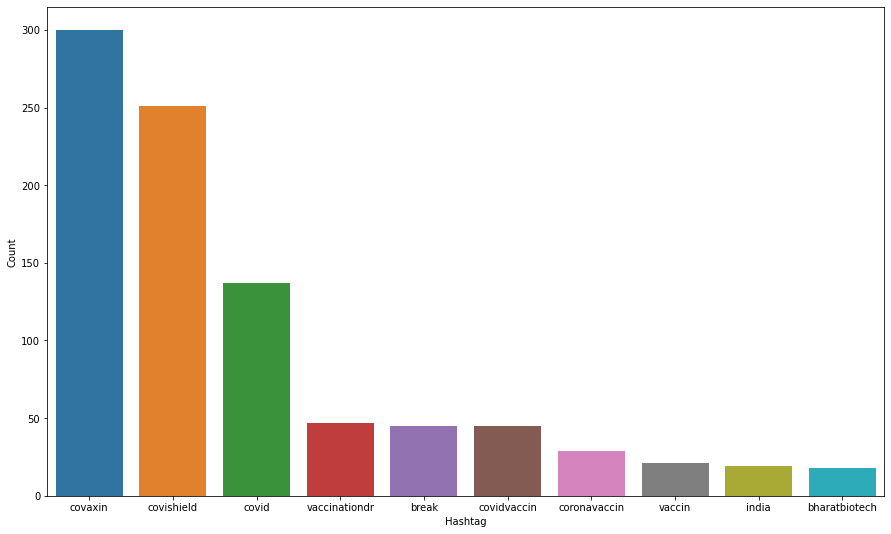

In [33]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [34]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,vaccin,58
1,efficaci,2
2,watch,2
3,largestvaccinedr,5
4,vaccinationdr,17


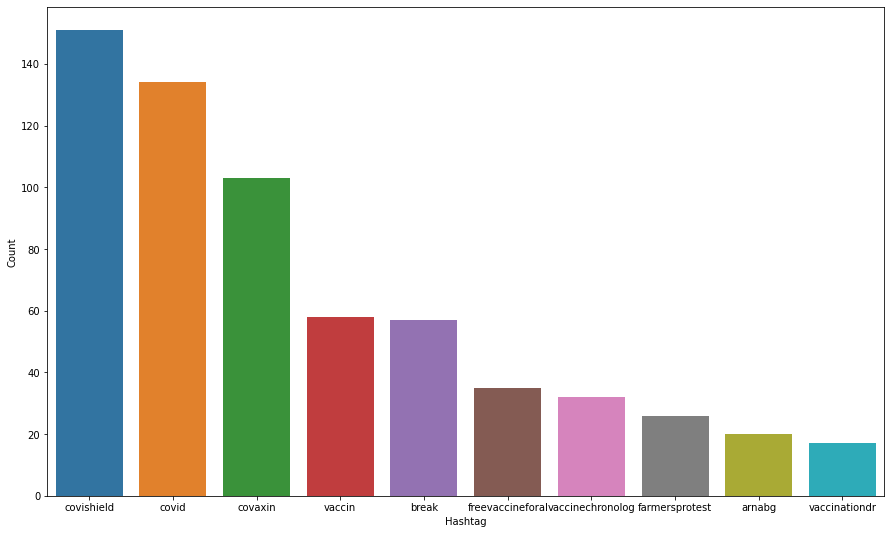

In [35]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Machine learning models implementations 
## Logistic regression 


In [36]:

# logistic regression 

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df1['clean_content'])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df1['Sentiment'], random_state=42, test_size=0.25)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [39]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
predictions = model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,predictions))

[[596   8]
 [ 15 250]]


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       604
           1       0.97      0.94      0.96       265

    accuracy                           0.97       869
   macro avg       0.97      0.97      0.97       869
weighted avg       0.97      0.97      0.97       869



## Logistic regression accuracy

In [44]:
# logistic regression accuracy
pred = model.predict(x_test)
accuracy = f1_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.60%


## xGBoost Model

In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
# xGBoost Model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df1['Sentiment'], random_state=42, test_size=0.25)



In [47]:
#XGB classifier
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [48]:
pred = xgb_regressor.predict(x_test)

# xGBoost Model accuracy

In [49]:
# xGBoost Model accuracy
predictions = [round(value) for value in pred]
#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.74%


# SVM Model

In [50]:
# SVM Model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [51]:
predictions = svc_model.predict(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,predictions))

[[599   5]
 [ 38 227]]


In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       604
           1       0.98      0.86      0.91       265

    accuracy                           0.95       869
   macro avg       0.96      0.92      0.94       869
weighted avg       0.95      0.95      0.95       869



## SVM Model accuracy

In [55]:
## SVM Model ccuracy
pred = svc_model.predict(x_test)
accuracy = f1_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.35%
